## IRIS DATASET CLASSIFICATION PROJECT - TASK 1

This dataset is imported from http://archive.ics.uci.edu/dataset/53/iris . Here I am performing classification of the Iris flowers into the respective classes namely Iris Setosa, Iris Versicolour, Iris Virginica based on their numeric attributes.
The attributes are petal length, petal width, sepal length, sepal width.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# Import data

In [2]:
iris= pd.read_csv("E:/Datascience_activity/iris/iris.data")

In [3]:
iris

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.shape

(149, 5)

In [5]:
iris.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [6]:
iris.dtypes

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

# Split the data

In [7]:
iris2=pd.DataFrame(iris)

In [8]:
iris2.columns=['sepal length','sepal width','petal length','petal width','class']

In [9]:
display(iris2)

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
# To Set petal length and petal width as features for modeling
X=iris2.iloc[:,2:]

In [11]:
display(X)

,petal length,petal width,class
0,1.4,0.2,Iris-setosa
1,1.3,0.2,Iris-setosa
2,1.5,0.2,Iris-setosa
3,1.4,0.2,Iris-setosa
4,1.7,0.4,Iris-setosa
...,...,...,...
144,5.2,2.3,Iris-virginica
145,5.0,1.9,Iris-virginica
146,5.2,2.0,Iris-virginica
147,5.4,2.3,Iris-virginica


## Gaussian Mixture model (GMM)

GMM is primarily used for unsupervised clustering tasks when the number of clusters is not known beforehand.
To discover underlying clusters or patterns in the iris dataset without any ground truth labels.

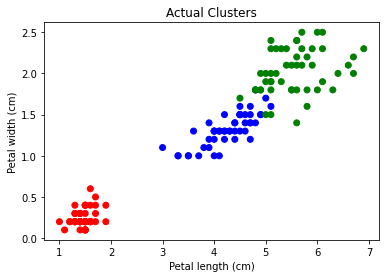

In [12]:
# Displays the actual clusters labelled with different colours
colormap = np.array(['red', 'blue', 'green'])

# Scatter plot with updated colors
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colormap[iris2['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})])
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Actual Clusters")
plt.show()

In [13]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 3, random_state=42)

In [14]:
X=X.drop('class',axis=1)
model.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [15]:
predicted_labels = model.predict(X)

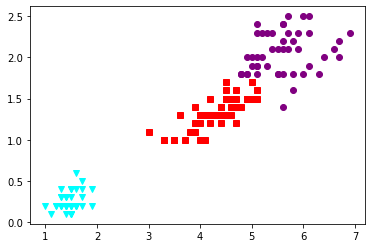

In [16]:
colormap_prediction = np.array(['purple', 'cyan', 'red'])
markers = ['o', 'v', 's']

# Plots the instances in the predicted clusters
for i, l in enumerate(predicted_labels):
    plt.plot(X.iloc[i,0], X.iloc[i,1], color=colormap_prediction[l], marker=markers[l])    
plt.show()

## SVM Classifier

SVM is a supervised learning algorithm used for both classification and regression tasks.
Here we have labeled data in the iris dataset (where each sample is labeled as one of the three classes), hence we can use SVM to build a classifier that can predict the class of new, unseen data points.

In [17]:
iris2.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


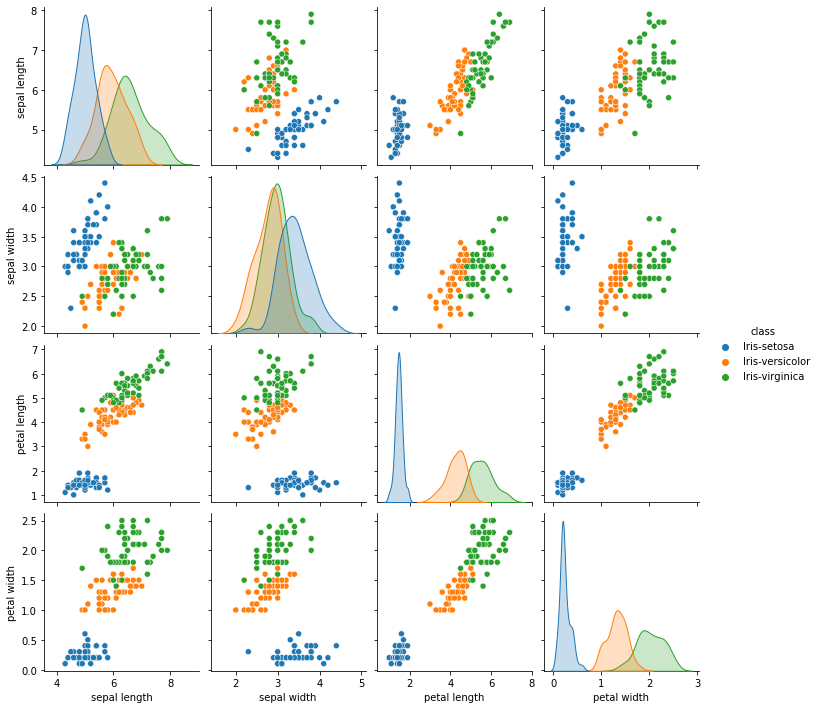

In [18]:
sns.pairplot(iris2, hue="class")

In [19]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    iris2.iloc[:,:-1], iris2["class"], test_size=0.20, stratify=iris2["class"], random_state=42)

In [21]:
train_unique_labels, train_unique_label_count = np.unique(y_train, return_counts=True)

test_unique_labels, test_unique_label_count = np.unique(y_test, return_counts=True)

print("Train set distribution:\n")
print(train_unique_labels, np.round(train_unique_label_count/X_train.shape[0], 2))

print("\nTest set distribution:\n")
print(test_unique_labels, np.round(test_unique_label_count/X_test.shape[0], 2))

Train set distribution:

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] [0.33 0.34 0.34]

Test set distribution:

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] [0.33 0.33 0.33]


## Linear SVC

In [22]:
linear_svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])

In [23]:
linear_svm_cross_val_scores = cross_val_score(
    linear_svm_pipeline, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)

In [24]:
print("Scores: {}\nMean Score: {}, Mean Score Std. Dev.: {}".format(
    linear_svm_cross_val_scores, 
    np.mean(linear_svm_cross_val_scores), 
    np.std(linear_svm_cross_val_scores)))

Scores: [0.91666667 0.91666667 0.875      0.95833333 1.        ]
Mean Score: 0.9333333333333332, Mean Score Std. Dev.: 0.042491829279939886


## Non Linear SVC

In [25]:
polynomial_svm_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
    ])

In [26]:
polynomial_svm_cross_val_scores = cross_val_score(
    polynomial_svm_pipeline, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)

In [27]:
print("Scores: {}\nMean Score: {}, Mean Score Std. Dev.: {}".format(
    polynomial_svm_cross_val_scores, 
    np.mean(polynomial_svm_cross_val_scores), 
    np.std(polynomial_svm_cross_val_scores)))

Scores: [0.95833333 0.95833333 0.875      1.         1.        ]
Mean Score: 0.9583333333333334, Mean Score Std. Dev.: 0.045643546458763846


### Performance evaluation

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [29]:
clf = DecisionTreeClassifier(random_state=42)


In [30]:
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.93


In [31]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [32]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


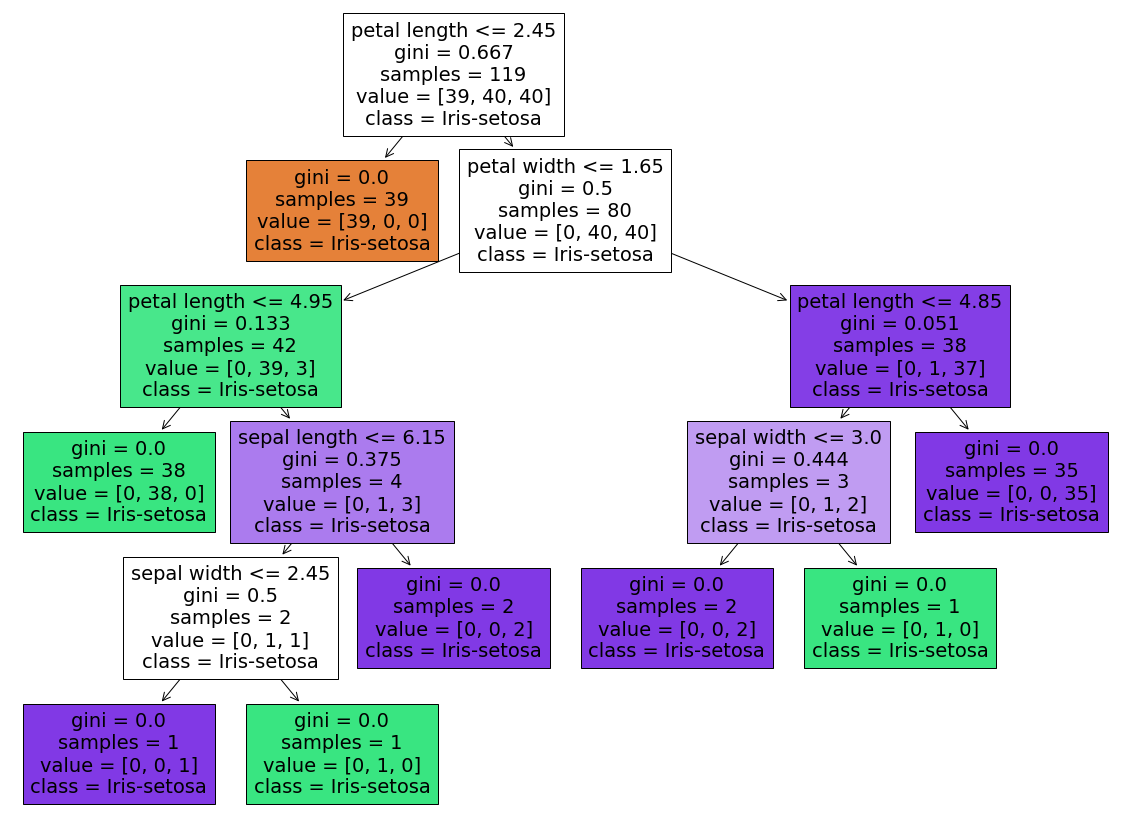

In [33]:
feature_names = iris2.drop('class', axis=1).columns
plt.figure(figsize=(20, 15))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=iris2["class"])
plt.show()